## 불순도
* 데이터 그룹내 얼마나 다양한 객체가 있는지를 수치로 표현
* 의사결정나무의 가지는 불순도가 적은 방향으로 형성해 나간다.
* 불순도를 계산하는 알고리즘에는 CART, ID3/C4.5/C5, CHAID등이 있다.
* 각각의 알고리즘을 통해 얻을수 있는 지표는 지니계수, 엔트로피등이 있다.


<img src = 'img/impurity.png'>

## 불순도 계산 알고리즘 비교
* CART : 보편적 알고리즘, 불순도 지표로 지니계수 사용, 계산속도 빠름
* ID3: 범주형변수를 이용한 이항분류, 불순도 지표로 엔트로피 사용
    + C4.5 : 다항분류, 연속형변수를 이용한 회귀에도 사용가능
    + C5 : 저작권이 걸린 알고리즘, 앙상블트리 생성
* CHAID : 통계적 분석 적용, 범주형변수는 카이젭곱 검정을 연속형변수는 F검정을 통해 분류작업 수행

## 엔트로피 
* 물리 열역학에서의 관점
    + 물질의 열적상태를 나타내는 물리량의 하나 
    + 보통 무질서도 라고 한다.
    + 엔트로피가 높으면 무질서도 가 증가
* 통계에서의 관점
    + 정보이득의 혼잡도/불순도
    + 엔트로피가 높으면 정보이해가 어려워진다.
    + 즉, 정보의 불확실성을 수치로 나타낸 것
* 학습데이터는 기본적으로 혼잡한 상태
    + 따라서, 어떤 조건으로 분류해야만 전체 불순도가 개선되는지 계산
    + 정리한 결과에 대해 다시 계산해서 처리를 반복 적용


In [1]:
# x = [1,2,3,4,5,6,7,8]
# y = [0,0,0,1,1,1,1,1]
# x를 기준으로 y를 나누는 가장 좋은 방법은
# 방법1) x = 3.5(최적의 조건)
# 방법2) x = 4.5(오분류 가능성 존재)

## 엔트로피 공식
* $ entropy = - \sum p_k \log2 p_k $
* 복수의 현상 n개가 존재할때 그 불순도를 나타내는 엔트로피 식은
    + -p(현상1) * log(p(현상1)) + -p(현상2) * log(p(현상2)) + ... + -p(현상n) * log(p(현상n)) 
* 엔트로피는 일반적으로 2를 밑으로 하는 로그로 계산

In [3]:
import math

# 확률 0.1 현상이 10개 일어난 경우 엔트로피는?
-1 * (-0.1 * math.log2(0.1)) * 10

-3.3219280948873626

In [6]:
# 확률 0.25 현상이 4개 일어난 경우 엔트로피는?
-1 * (-0.25 * math.log2(0.25)) * 4

-2.0

In [8]:
# 3가지 특성에 따라 10마리 동물을 개/고양이로 분류
# big, follow,    walking, class
# yes,    yes,      yes,    dog
# yes,    yes,       no,    cat
# no,     yes,      yes,    dog
# yes,    yes,      yes,    dog
# no,      no,      yes,    cat
# yes,     no,      yes,    dog
# yes,     no,      yes,    cat
# no,      no,       no,    cat
# yes,    yes,      yes,    dog
# no,     yes,       no,    dog

In [12]:
# 1) target 엔트로피 계산
# 10마리 중 개는 6마리, 고양이는 4마리
# 개로 분류될 확률 : 6/10  = 0.6
# 고양이로 분류될 학률 : 4/10 =0.4
# 따라서 엔트로피는 
# -0.6 * log2(0.6) - 0.4 * log2(0.4)

a = -0.6 * math.log2(0.6)
b = -0.4 * math.log2(0.4)
a + b

0.9709505944546686

In [14]:
# 2) 덩치(big)로 분류했을때 엔트로피 계산
# big 큰것으로 분류 : 개:고양이 -> 4:2
# 덩치가 클때 개로 분류될 확률 : 4/6 = 0.667
# 덩치가 클때 고양이로 분류될 확률 : 2/6 = 0.333
a = -0.667 * math.log2(0.667)
b = -0.333 * math.log2(0.333)
a+b

0.9179621399872384

In [20]:
# big 작은것으로 분류 :  개 : 고양이 -> 2:2
# 덩치가 작을때 개로 분류될 확률 : 2:4
# 덩치가 작을때 고양이로 분류될 확률 : 2:4
a = -0.5 * math.log2(0.5) * 2
a

1.0

## 정보획득 
* 불순도 지표를 구할 수 있다면, 이를 통해 어떤 질문에서 얻을 수 있는 정보획득량을 계산할 수 있음
    + 분할되기전 데이터에서 얻을 수 있는 정보획등량과
    + 어떤 기준에 따라 분할된 데이터에서 얻을 수 있는 정보획득량 비교
* 생성된 크기에 따라 가중치를 구하고 이를 불순도에 곱함 

In [24]:
# 덩치로 분류했을때의 정보획득량은
# 개로 분류될 확률 X 덩치로 분류 했을때 불순도와
# 고양이로 분류될 확률 X 덩치로 분류했을때 불순도를 더한 결과값
6/10 * 0.918 + 4/10 * 1.0   # 0.971 -> 0.951

0.9508

In [29]:
# 3) 따름 fellow로 분류했을때 엔트로피 계산
# 잘 따름으로 분류 = 개:고양이 ->  5:1
# 잘 따를때 개로 분류될 확률 :   5:6  -> 0.833
# 잘 따를때 고양이로 분류될 확률 : 1:6 -> 0.167
a = -0.833 * math.log2(0.833)
b = -0.167 * math.log2(0.167)
a+b   # 0.651

0.6507958209094192

In [31]:
# 잘 안따름으로 분류 = 개:고양이  1:3
# 잘 안따를때 개로 분류될 확률 :  1/4  -> 0.25
# 잘 안따를때 고양이로 분류될 확률 : 3/4 -> 0.75

a = -0.25 * math.log2(0.25)
b = -0.75 * math.log2(0.75)
a+b

0.8112781244591328

In [32]:
# 따름으로 분류 했을때의 정보획득량은 
# 개로 분류될 확률 x 따름으로 분류했을때 불순도와
# 고양이로 분류될 확률 x 따름으로 분류했을때 불순도를 더한 결과값

6/10 * 0.651 + 4/10 * 0.811 

0.7150000000000001

In [36]:
# 4) 산책 walking로 분류했을때 엔트로피 계산
# 산책한다로 분류 = 개:고양이 ->  5:2
# 산책하는데 개로 분류될 확률 :   5:7 -> 0.714
# 산책하는데 고양이로 분류될 확률 : 2:7 -> 0.29

a = -0.714 * math.log2(0.714)
b = -0.29 * math.log2(0.29)
a+b

0.8649106771796271

In [40]:
# 산책안한다로 분류 : 개:고양이 -> 1:2
# 산책안하는데 개로 분류될 확률 : 1:3 -> 0333
# 산책안하는데 고양이로 분류될 확률 : 2:3 -> 0.667
a = -0.333 * math.log2(0.333)
b = -0.667 * math.log2(0.667)
a+b

0.9179621399872384

In [44]:
# 산책으로 분류했을때의 정보획득량은 
# 개로 분류될 확률 x 산책으로 분류했을때 불순도와
# 고양이로 분류될 확률 x 산책으로 분류했을때 불순도를 더한 결과값
6/10 * 0.864 + 4/10 * 0.918

0.8855999999999999

In [43]:
# 따라서, 덩치, 산책, 따름 여부에 따라 정보의 불순도 비교
# 덩치 : 0.971 -> 0.951
# 산책 : 0.971 -> 0.885
# 따름 : 0.971 -> 0.715(!!)

In [67]:
## 개/고양이 분류를 의사결정 나무 분석

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import pydotplus
from sklearn import tree
import matplotlib.image as pltimg

In [52]:
catdog = pd.read_csv('csv/catdog.csv')

catdog.head()

,big,follow,walking,class
0,yes,yes,yes,dog
1,yes,yes,no,cat
2,no,yes,yes,dog
3,yes,yes,yes,dog
4,no,no,yes,cat


In [65]:
# 종속변수 빈도 확인
catdog['class'].value_counts()

dog    6
cat    4
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

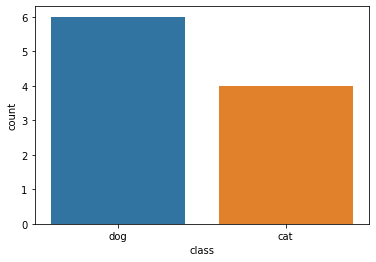

In [70]:
sns.countplot(catdog['class'], data=catdog)

In [71]:
# 전처리 - 레이블인코딩
cols = ['big','follow','walking','class']

for c in cols:
    catdog[c] = pd.Categorical(catdog[c])
    catdog[c] = catdog[c].cat.codes
    
catdog.head()

,big,follow,walking,class
0,1,1,1,1
1,1,1,0,0
2,0,1,1,1
3,1,1,1,1
4,0,0,1,0


In [75]:
# 데이터 분리 및 분석
data = catdog.iloc[:, :3]
target = catdog['class']

In [76]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(data, target)
dtc.score(data, target)

0.9

(-0.5, 710.5, 580.5, -0.5)

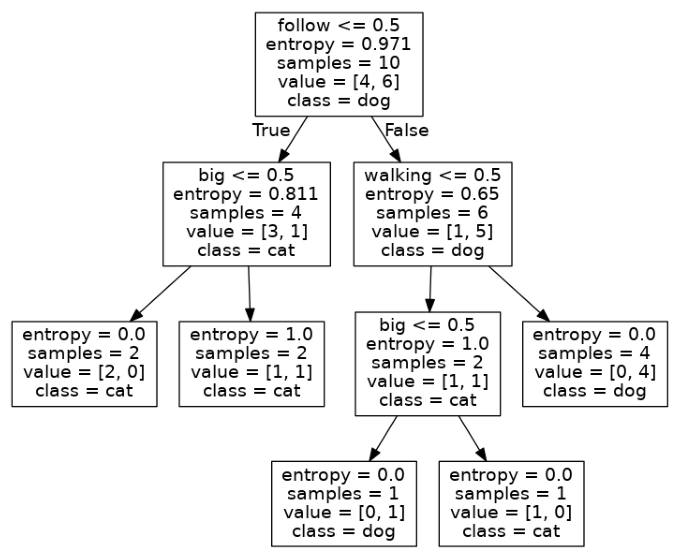

In [77]:
# 분석결과 시각화
# 의사결정나무 분석 시각화

# feature_names : 특성명 지정
# class_names : 레이블명 지정
dot_data = tree.export_graphviz(dtc, out_file=None, feature_names=cols[:3], class_names=['cat','dog'])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('img/catdog.png')

img = plt.imread('img/catdog.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')

In [117]:
pgolf = pd.read_csv('csv/playgolf.csv', sep='|')

pgolf

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY
0,sunny,85,85,False,Don'tPlay
1,sunny,80,90,True,Don'tPlay
2,overcast,83,78,False,Play
3,rain,70,96,False,Play
4,rain,68,80,False,Play
5,rain,65,70,True,Don'tPlay
6,overcast,64,65,True,Play
7,sunny,72,95,False,Don'tPlay
8,sunny,69,70,False,Play
9,rain,75,80,False,Play


In [118]:
# 전처리 - 레이블인코딩
cols = ['OUTLOOK','TEMPERATURE','HUMIDITY','WINDY','PLAY']

for c in cols:
    pgolf[c] = pd.Categorical(pgolf[c])
    pgolf[c] = pgolf[c].cat.codes
    
pgolf.head()

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY
0,2,11,5,0,0
1,2,8,6,1,0
2,0,10,3,0,1
3,1,4,8,0,1
4,1,2,4,0,1


In [122]:
# 데이터 분리 및 분석
data = pgolf.iloc[:, :4]
target = pgolf['PLAY']

In [123]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(data, target)
dtc.score(data, target)

1.0

In [126]:
# # 분석결과 시각화
# # 의사결정나무 분석 시각화

# # feature_names : 특성명 지정
# # class_names : 레이블명 지정

# dot_data = tree.export_graphviz(dtc, out_file=None, feature_names=cols[:4], class_names=['PLAY'])
# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png('img/pgolf.png')

# img = plt.imread('img/pgolf.png')
# plt.figure(figsize=(12,10))
# plt.imshow(img)
# plt.axis('off')